<a href="https://colab.research.google.com/github/ryonce/Sales-Predictions/blob/main/Project_1_Part_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1 - Part 2
- Robert Yonce


## Loading Data

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQB3n8HYyoEkSD-62rMPiDoS04bdMvY4GZQDSN91Ngp5lDUp0nGiOLJ8jZLxz3QAVZOMelr46SzLkEQ/pub?output=csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Cleaning Data

In [5]:
# How many rows and columns? Use info method
df.info()
#12 columns and 8523 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
# What are the datatypes of each variable? info method above gives the information

In [7]:
# Are there duplicates? If so, drop any duplicates.
df.duplicated().sum()



0

In [8]:
# Identify missing values
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
# Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).
# Chose to do the mean of Item_Weight column then replaced all the NaN with that value.

itemweight_replace = round(df['Item_Weight'].mean(), 2)

df['Item_Weight'].fillna(value = itemweight_replace, inplace=True)


In [10]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
df['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [12]:
# Created variables to see if there were in correlations
# Also ran value counts to see the values in the list before
groc = df['Outlet_Type'] == 'Grocery Store'
super1 = df['Outlet_Type'] == 'Supermarket Type1'
super2 = df['Outlet_Type'] == 'Supermarket Type2'
super3 = df['Outlet_Type'] == 'Supermarket Type3'
tier1 = df['Outlet_Location_Type'] == 'Tier 1'
tier2 = df['Outlet_Location_Type'] == 'Tier 2'
tier3 = df['Outlet_Location_Type'] == 'Tier 3'
df['Outlet_Size'][groc].value_counts(dropna = False)

NaN      555
Small    528
Name: Outlet_Size, dtype: int64

In [13]:
# Replacing the NaN values in Outlet_Size with Small using the filter created above
df['Outlet_Size'][groc] = df['Outlet_Size'][groc].fillna(value = 'Small')
df[groc]

<ipython-input-13-f52f68238d7f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Outlet_Size'][groc] = df['Outlet_Size'][groc].fillna(value = 'Small')


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
23,FDC37,12.860,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,Small,Tier 3,Grocery Store,178.4344
29,FDC14,12.860,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
30,FDV38,19.250,Low Fat,0.170349,Dairy,55.7956,OUT010,1998,Small,Tier 3,Grocery Store,163.7868
...,...,...,...,...,...,...,...,...,...,...,...,...
8473,DRI47,14.700,Low Fat,0.035016,Hard Drinks,144.3128,OUT010,1998,Small,Tier 3,Grocery Store,431.4384
8480,FDQ58,12.860,Low Fat,0.000000,Snack Foods,154.5340,OUT019,1985,Small,Tier 1,Grocery Store,459.4020
8486,FDR20,20.000,Regular,0.000000,Fruits and Vegetables,46.4744,OUT010,1998,Small,Tier 3,Grocery Store,45.2744
8490,FDU44,12.860,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [14]:
# Reran value counts to test if code worked
df['Outlet_Size'][groc].value_counts()

Small    1083
Name: Outlet_Size, dtype: int64

In [15]:
# Ran code to see values for my filter
df['Outlet_Size'][tier2].value_counts(dropna = False)


NaN      1855
Small     930
Name: Outlet_Size, dtype: int64

In [16]:
# Replacing the NaN values in Outlet_Size with Small using the filter created above
df['Outlet_Size'][tier2] = df['Outlet_Size'][tier2].fillna(value = 'Small')
df[tier2]

<ipython-input-16-339fc9e242b2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Outlet_Size'][tier2] = df['Outlet_Size'][tier2].fillna(value = 'Small')


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8,FDH17,16.20,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Small,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.20,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Small,Tier 2,Supermarket Type1,4710.5350
19,FDU02,13.35,Low Fat,0.102492,Dairy,230.5352,OUT035,2004,Small,Tier 2,Supermarket Type1,2748.4224
22,NCB30,14.60,Low Fat,0.025698,Household,196.5084,OUT035,2004,Small,Tier 2,Supermarket Type1,1587.2672
25,NCD06,13.00,Low Fat,0.099887,Household,45.9060,OUT017,2007,Small,Tier 2,Supermarket Type1,838.9080
...,...,...,...,...,...,...,...,...,...,...,...,...
8510,FDN58,13.80,Regular,0.056862,Snack Foods,231.5984,OUT035,2004,Small,Tier 2,Supermarket Type1,7182.6504
8513,FDH31,12.00,Regular,0.020407,Meat,99.9042,OUT035,2004,Small,Tier 2,Supermarket Type1,595.2252
8514,FDA01,15.00,Regular,0.054489,Canned,57.5904,OUT045,2002,Small,Tier 2,Supermarket Type1,468.7232
8519,FDS36,8.38,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850


In [17]:
# Running code to check if worked
df['Outlet_Size'][tier2].value_counts()

Small    2785
Name: Outlet_Size, dtype: int64

In [18]:
# All misssing values have been replaced
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [19]:
# Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent).
df.nunique()


Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [20]:
# Ran the value_counts above to find the inconsistent values and replaced here. 
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [21]:
# For any numerical columns, obtain the summary statistics of each (min, max, mean). 
# Item_Weight
print(f"Min is {df['Item_Weight'].min()}")
print(f"Max is {df['Item_Weight'].max()}")
print(f"Mean is {df['Item_Weight'].mean()}")

Min is 4.555
Max is 21.35
Mean is 12.85804939575267


In [22]:
# For any numerical columns, obtain the summary statistics of each (min, max, mean). 
# Item_Visibility
print(f"Min is {df['Item_Visibility'].min()}")
print(f"Max is {df['Item_Visibility'].max()}")
print(f"Mean is {df['Item_Visibility'].mean()}")

Min is 0.0
Max is 0.328390948
Mean is 0.06613202877895108


In [23]:
# For any numerical columns, obtain the summary statistics of each (min, max, mean). 
# Item_MRP
print(f"Min is {df['Item_MRP'].min()}")
print(f"Max is {df['Item_MRP'].max()}")
print(f"Mean is {df['Item_MRP'].mean()}")

Min is 31.29
Max is 266.8884
Mean is 140.9927819781767


In [24]:
# For any numerical columns, obtain the summary statistics of each (min, max, mean). 
# Outlet_Establishment_Year
print(f"Min is {df['Outlet_Establishment_Year'].min()}")
print(f"Max is {df['Outlet_Establishment_Year'].max()}")
print(f"Mean is {df['Outlet_Establishment_Year'].mean()}")

Min is 1985
Max is 2009
Mean is 1997.8318667135984


In [25]:
# For any numerical columns, obtain the summary statistics of each (min, max, mean). 
# Item_Outlet_Sales
print(f"Min is {df['Item_Outlet_Sales'].min()}")
print(f"Max is {df['Item_Outlet_Sales'].max()}")
print(f"Mean is {df['Item_Outlet_Sales'].mean()}")

Min is 33.29
Max is 13086.9648
Mean is 2181.288913575032


## Part 3

## Exploratory Visuals

<AxesSubplot:>

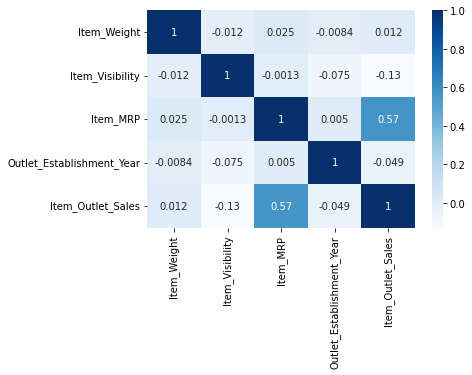

In [26]:
# Heatmap to see if any correlations between columns
corr = df.corr()
import seaborn as sns
sns.heatmap(corr, cmap = 'Blues', annot = True)

In [27]:
import numpy as np
import matplotlib.pyplot as plt

Text(0, 0.5, 'Count')

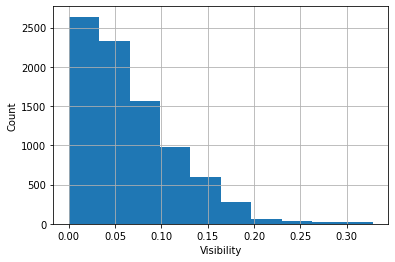

In [28]:
# Histogram of Item Visibility to see count
df['Item_Visibility'].hist()
plt.ticklabel_format(useOffset=False, style='plain')
plt.xlabel('Visibility')
plt.ylabel('Count')


Text(0, 0.5, 'Count')

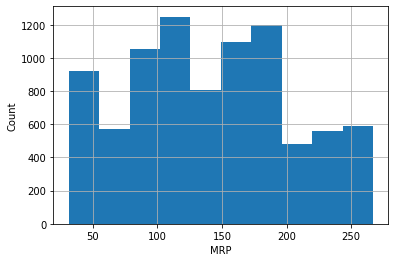

In [29]:
# Histogram of Item MRP to see count
df['Item_MRP'].hist()
plt.ticklabel_format(useOffset=False, style='plain')
plt.xlabel('MRP')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

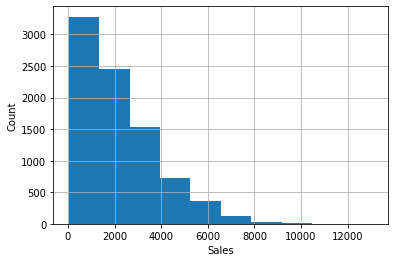

In [30]:
# Histogram of Item Outlet Sales to see count
df['Item_Outlet_Sales'].hist()
plt.ticklabel_format(useOffset=False, style='plain')
plt.xlabel('Sales')
plt.ylabel('Count')

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb3eb5a81f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb3eb5a8790>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb3eb597ee0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb3eb5a8d30>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb3eb5b6040>],
 'means': []}

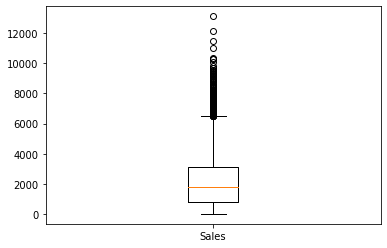

In [31]:
# Boxplot of Item Outlet Sales to see how far some are from the median
sales = df['Item_Outlet_Sales']

plt.boxplot(sales, labels = ['Sales'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb3eb50ac40>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb3eb519220>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb3eb50a970>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb3eb5197c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb3eb519a90>],
 'means': []}

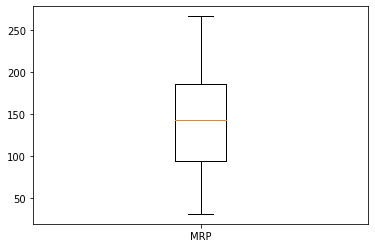

In [32]:
# Boxplot of Item MRP to see how the compact from the median
mrp = df['Item_MRP']

plt.boxplot(mrp, labels = ['MRP'])

In [33]:
# Copy this from the example notebook. I wanted to see the differences in Types of stores
plt.style.use(['dark_background','seaborn-muted', 'seaborn-poster'])

In [34]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

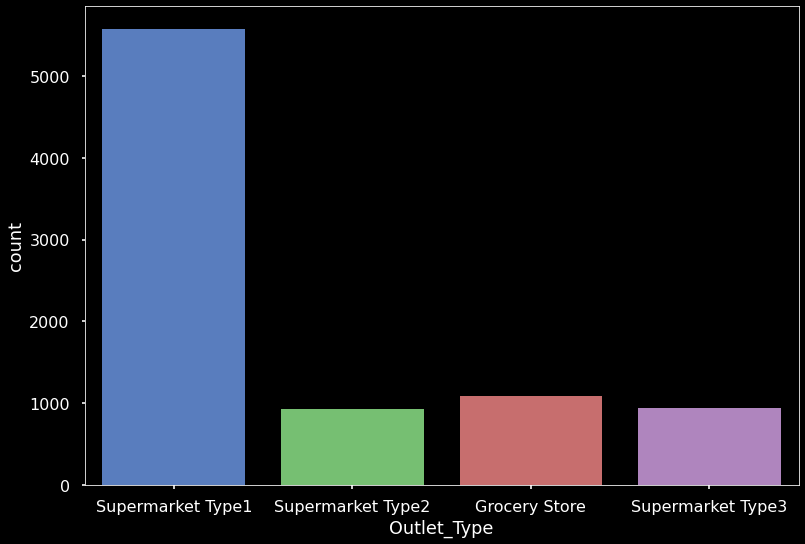

In [35]:
ax = sns.countplot(data = df, x = 'Outlet_Type');

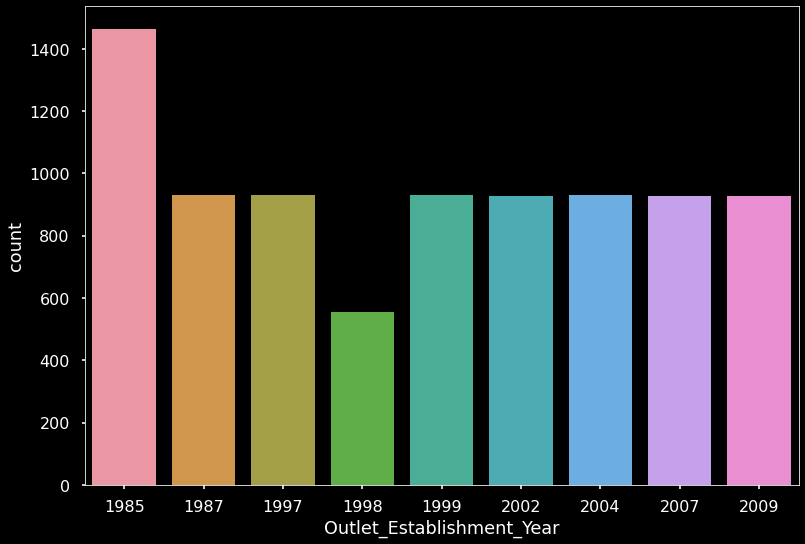

In [36]:
# Seeing the distribution of stores throughtout the years
ax = sns.countplot(data = df, x = 'Outlet_Establishment_Year');

## Explanatory Visuals

In [37]:
# Pull info again to see which columns I wanted to work with.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## What is the averages sales for each Outlet Size?

In [38]:
# Creating a variable for average sales for each Outlet Size
mean_sales = df.groupby('Outlet_Size')['Item_Outlet_Sales'].mean().sort_values(ascending = False)
mean_sales


Outlet_Size
Medium    2681.603542
High      2298.995256
Small     1867.182814
Name: Item_Outlet_Sales, dtype: float64

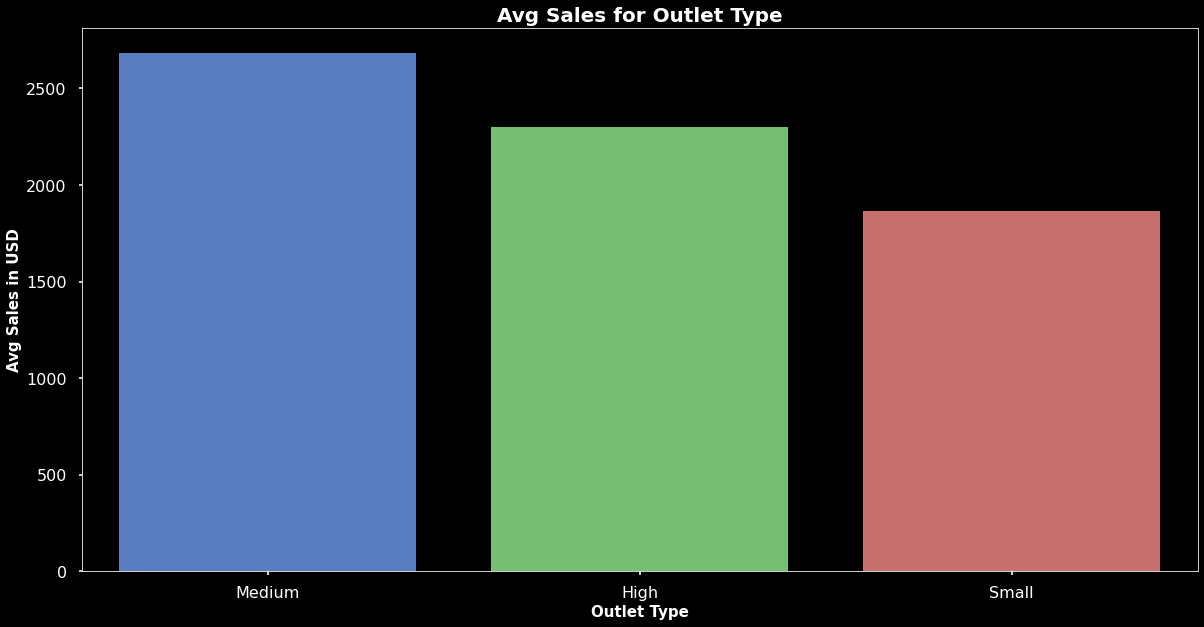

In [41]:
# Create Barplot for Sales with using my varible in the order
fig, ax = plt.subplots(figsize=(20,10))

ax = sns.barplot(data = df, x ='Outlet_Size', y = 'Item_Outlet_Sales', order = mean_sales.index, ci = None)
ax.set_title('Avg Sales for Outlet Type', fontsize = 20, fontweight = 'bold');
ax.set_xlabel('Outlet Type', fontsize = 15, fontweight = 'bold')
ax.set_ylabel('Avg Sales in USD', fontsize = 15, fontweight = 'bold');



- From the graph, we are shown the Medium Outlet Types have the highest average followed by High Outlet. This is helpful to understand where the most money is being generated.


# Which outlet type was establised through each year?

In [42]:
# Get a value count of how many were created
df['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [54]:
# Created a variable to grouby the Establishment Year with what Outlize was created and value
outlets_year = df.groupby('Outlet_Establishment_Year')['Outlet_Size'].value_counts().sort_index()
outlets_year

Outlet_Establishment_Year  Outlet_Size
1985                       Medium         935
                           Small          528
1987                       High           932
1997                       Small          930
1998                       Small          555
1999                       Medium         930
2002                       Small          929
2004                       Small          930
2007                       Small          926
2009                       Medium         928
Name: Outlet_Size, dtype: int64

Outlet_Establishment_Year  Outlet_Size
1985                       Medium         935
                           Small          528
1987                       High           932
1997                       Small          930
1998                       Small          555
1999                       Medium         930
2002                       Small          929
2004                       Small          930
2007                       Small          926
2009                       Medium         928
Name: Outlet_Size, dtype: int64


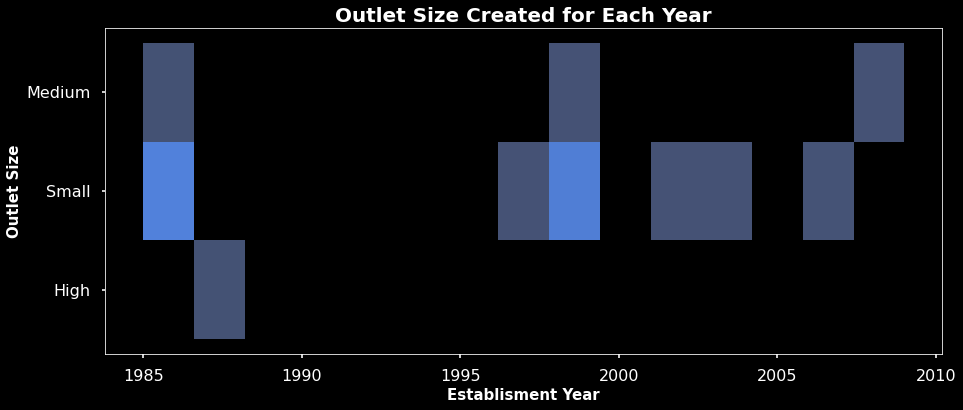

In [55]:
# Create a Histplot to show which Outlet Size was being created with the exact amounts below the graph.
fig, ax = plt.subplots(figsize=(15,6))

ax = sns.histplot(data = df, x = 'Outlet_Establishment_Year', y = 'Outlet_Size')
ax.set_title('Outlet Size Created for Each Year', fontsize = 20, fontweight = 'bold');
ax.set_xlabel('Establisment Year', fontsize = 15, fontweight = 'bold')
ax.set_ylabel('Outlet Size', fontsize = 15, fontweight = 'bold');

print(outlets_year)

- As we see, High has not been established since 1987 and Small is established more often. With average sales being highest at Medium Outlets, could recommend more Medium Outlets.

- Above the graph is the total amount of each size created that year.


# Is their a correlation with Item Visibility and Item Sales? Does more Visibility help an item with Sales?

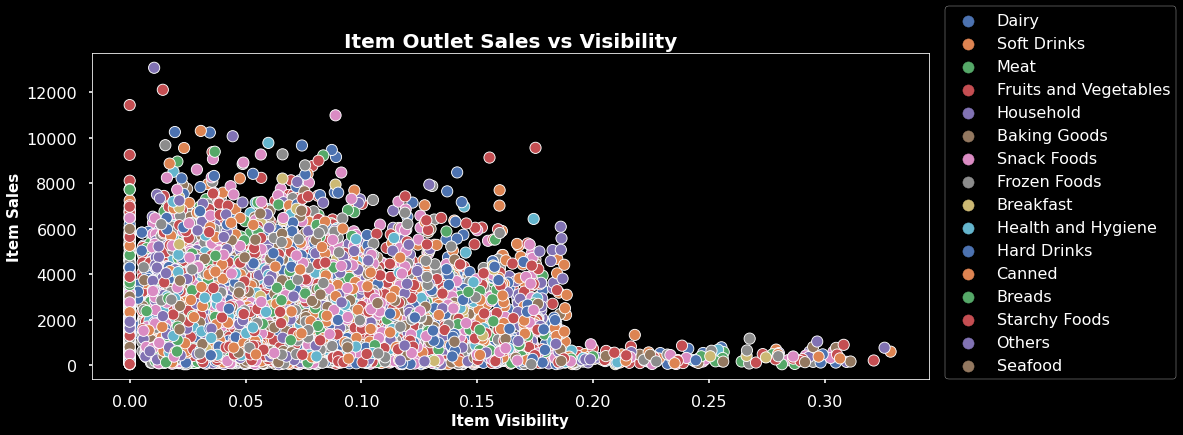

In [45]:
# Create a scatter plot to show the Sales and Visibility
fig, ax = plt.subplots(figsize=(15,6))

ax = sns.scatterplot(data = df, x = 'Item_Visibility', y = 'Item_Outlet_Sales', hue = 'Item_Type', palette = 'deep')
ax.set_title('Item Outlet Sales vs Visibility', fontsize = 20, fontweight = 'bold');
ax.set_xlabel('Item Visibility', fontsize = 15, fontweight = 'bold')
ax.set_ylabel('Item Sales', fontsize = 15, fontweight = 'bold');
plt.legend(loc = (1.02,0));



- This graph shows alot of great info. Many items have low visibility but high sales! Many items don't have a visibility over 20%. Could break down more for individual item types but great start to understand the products we are selling. Does not show a correlation for Item Sales and Visibility